In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D


%matplotlib notebook
import numpy as np

def cylinder(r,n,h):
    '''
    Returns the unit cylinder that corresponds to the curve r.
    INPUTS:  r - a vector of radii
             n - number of coordinates to return for each element in r

    OUTPUTS: x,y,z - coordinates of points
    '''

    # ensure that r is a column vector
    r = np.atleast_2d(r)
    r_rows,r_cols = r.shape
    
    if r_cols > r_rows:
        r = r.T

    # find points along x and y axes
    points  = np.linspace(0,2*np.pi,n+1)
    x = np.cos(points)*r
    y = np.sin(points)*r

    # find points along z axis
    rpoints = np.atleast_2d(np.linspace(0,h,len(r)))
    z = np.ones((1,n+1))*rpoints.T
    
    return x,y,z

<IPython.core.display.Javascript object>


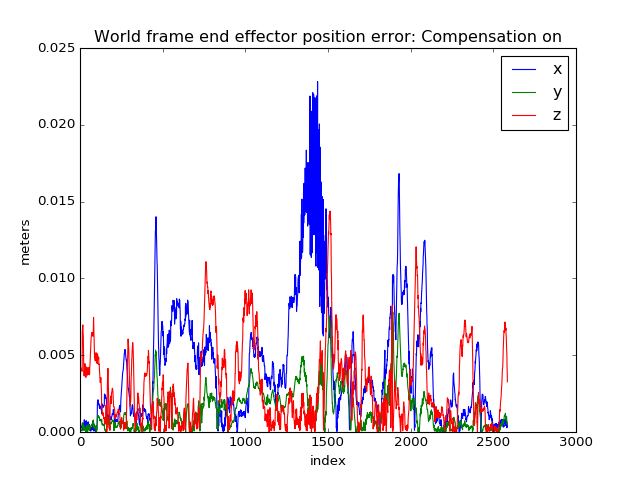

Average errors: 

[0.0040264021006316715, 0.0014317874188721487, 0.002932473589060283]


In [11]:
pkl_file = open('../anthony/data/physical/circle_supervised_1.pkl', 'rb')
vicon_1, state_1, _, _, error_1, average_error_1 = pickle.load(pkl_file)
pkl_file.close()

err_fig = plt.figure()
err_fig.add_subplot(111)
plt.plot(error_1[100:-100])
plt.ylabel('meters')
plt.title('World frame end effector position error: Compensation on')
plt.legend(['x', 'y', 'z'])
plt.legend(['x', 'y', 'z'])
plt.xlabel('index')


plt.show()

print("Average errors: \n")
print(average_error_1)

<IPython.core.display.Javascript object>


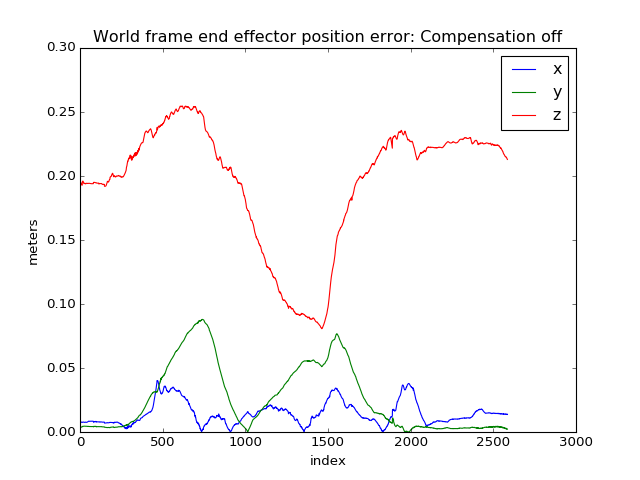

Average errors: 

[0.014928614994779328, 0.026443046034123837, 0.20241423477806447]


In [12]:
pkl_file = open('../anthony/data/physical/circle_supervised_off_0.pkl', 'rb')
vicon_2, state_2, _, _, error_2, average_error_2 = pickle.load(pkl_file)
pkl_file.close()

err_fig = plt.figure()
err_fig.add_subplot(111)
plt.plot(error_2[100:-100])
plt.ylabel('meters')
plt.title('World frame end effector position error: Compensation off')
plt.legend(['x', 'y', 'z'])
plt.legend(['x', 'y', 'z'])
plt.xlabel('index')


plt.show()

print("Average errors: \n")
print(average_error_2)

<IPython.core.display.Javascript object>


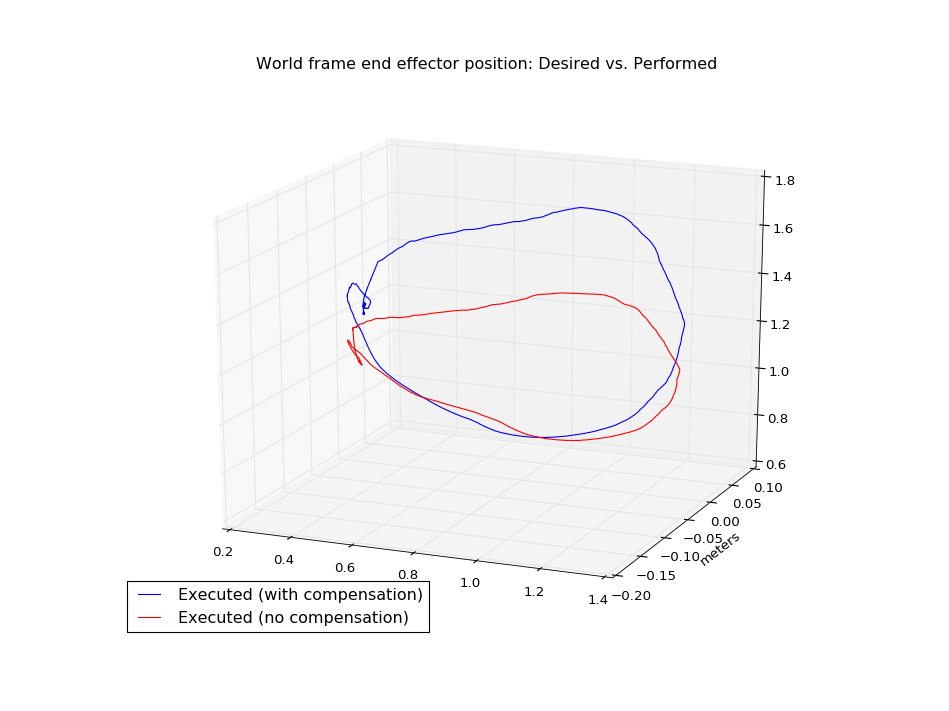

In [23]:
#plot for desired trajectory vs. executed trajectory without gravity compensation

end_effector_fig = plt.figure()
# end_effector_fig.add_subplot(111)
ax = end_effector_fig.add_subplot(111, projection='3d')
ax.plot(np.array(vicon_1)[100:-100,0], np.array(vicon_1)[100:-100,1], np.array(vicon_1)[100:-100,2], color = 'b')
plt.ylabel('meters')
plt.title('World frame end effector position: Desired vs. Performed', y=1.08)
# plt.legend(['x', 'y', 'z'])
# ax = end_effector_fig.add_subplot(212, projection='3d')
ax.plot(np.array(vicon_2)[100:-100,0], np.array(vicon_2)[100:-100,1], np.array(vicon_2)[100:-100,2], color = 'r')
plt.ylabel('meters')
# plt.title('World frame end effector position: Compensation off')
plt.legend(['Executed (with compensation)', 'Executed (no compensation)'], loc=3)

r = np.ones((250,1))*0.2
n = 50
h = 3

pos = [0, 0, 0]

[x,y,z] = cylinder(r,n,h)
# ax.plot_wireframe(x+pos[0],y+pos[1],z+pos[2], color='black')
# plt.axis('equal')

plt.show()

<IPython.core.display.Javascript object>


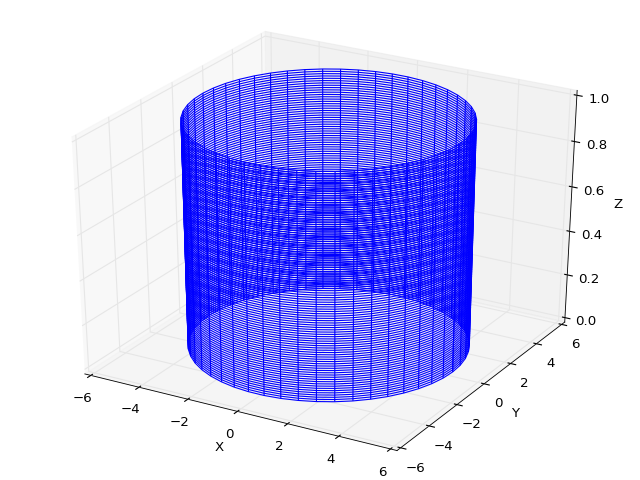

In [8]:
# set curve vector r and set n to 20
# r = np.linspace(2,.5,100)
r = np.ones((100,1))*5
n = 50

# get points from cylinder and plot
[x,y,z] = cylinder(r,n)

# make plots
fig=plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()